In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 1)IMPORT DATA

In [2]:
df = pd.read_csv("Highway1.csv", index_col = 0) #Downloaded from Rdatasets https://vincentarelbundock.github.io/Rdatasets/datasets.html

In [3]:
df.head()

,rate,len,adt,trks,sigs1,slim,shld,lane,acpt,itg,lwid,htype
1,4.58,4.99,69,8,0.200401,55,10,8,4.6,1.20,12,FAI
2,2.86,16.11,73,8,0.062073,60,10,4,4.4,1.43,12,FAI
3,3.02,9.75,49,10,0.102564,60,10,4,4.7,1.54,12,FAI
4,2.29,10.65,61,13,0.093897,65,10,6,3.8,0.94,12,FAI
5,1.61,20.01,28,12,0.049975,70,10,4,2.2,0.65,12,FAI


# 2) CALCULATE CORRELATION MATRIX

In [4]:
corr_matrix = df.corr()
corr_matrix

,rate,len,adt,trks,sigs1,slim,shld,lane,acpt,itg,lwid
rate,1.000000,-0.465290,-0.028570,-0.512522,0.603191,-0.680984,-0.386907,-0.032979,0.752025,-0.024841,-0.005619
len,-0.465290,1.000000,-0.271569,0.495943,-0.391851,0.186243,-0.104926,-0.202504,-0.238706,-0.247562,-0.310650
adt,-0.028570,-0.271569,1.000000,-0.096682,0.159381,0.244157,0.457307,0.823930,-0.223980,0.903701,0.127878
trks,-0.512522,0.495943,-0.096682,1.000000,-0.475308,0.296184,0.006135,-0.153324,-0.360266,-0.067231,-0.155271
sigs1,0.603191,-0.391851,0.159381,-0.475308,1.000000,-0.424415,-0.124103,0.263967,0.513461,0.087017,0.062084
slim,-0.680984,0.186243,0.244157,0.296184,-0.424415,1.000000,0.689009,0.264520,-0.681521,0.241282,0.098693
shld,-0.386907,-0.104926,0.457307,0.006135,-0.124103,0.689009,1.000000,0.481771,-0.424951,0.375022,-0.042896
lane,-0.032979,-0.202504,0.823930,-0.153324,0.263967,0.264520,0.481771,1.000000,-0.208779,0.697913,0.095723
acpt,0.752025,-0.238706,-0.223980,-0.360266,0.513461,-0.681521,-0.424951,-0.208779,1.000000,-0.200158,-0.042013
itg,-0.024841,-0.247562,0.903701,-0.067231,0.087017,0.241282,0.375022,0.697913,-0.200158,1.000000,0.102883


In [5]:
df_dummy = pd.get_dummies(df.htype) 
df_dummy

,FAI,MA,MC,PA
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
5,1,0,0,0
6,0,0,0,1
7,0,0,0,1
8,0,0,0,1
9,0,0,0,1
10,0,0,0,1


In [6]:
df = pd.concat([df, df_dummy], axis = 1)
df

,rate,len,adt,trks,sigs1,slim,shld,lane,acpt,itg,lwid,htype,FAI,MA,MC,PA
1,4.58,4.99,69,8,0.200401,55,10,8,4.6,1.20,12,FAI,1,0,0,0
2,2.86,16.11,73,8,0.062073,60,10,4,4.4,1.43,12,FAI,1,0,0,0
3,3.02,9.75,49,10,0.102564,60,10,4,4.7,1.54,12,FAI,1,0,0,0
4,2.29,10.65,61,13,0.093897,65,10,6,3.8,0.94,12,FAI,1,0,0,0
5,1.61,20.01,28,12,0.049975,70,10,4,2.2,0.65,12,FAI,1,0,0,0
6,6.87,5.97,30,6,2.007504,55,10,4,24.8,0.34,12,PA,0,0,0,1
7,3.85,8.57,46,8,0.816686,55,8,4,11.0,0.47,12,PA,0,0,0,1
8,6.12,5.24,25,9,0.570840,55,10,4,18.5,0.38,12,PA,0,0,0,1
9,3.29,15.79,43,12,1.453331,50,4,4,7.5,0.95,12,PA,0,0,0,1
10,5.88,8.26,23,7,1.331065,50,5,4,8.2,0.12,12,PA,0,0,0,1


In [7]:
corr_matrix = df.corr()

In [8]:
corr_matrix

,rate,len,adt,trks,sigs1,slim,shld,lane,acpt,itg,lwid,FAI,MA,MC,PA
rate,1.000000,-0.465290,-0.028570,-0.512522,0.603191,-0.680984,-0.386907,-0.032979,0.752025,-0.024841,-0.005619,-0.207610,0.337848,-0.041311,-0.161540
len,-0.465290,1.000000,-0.271569,0.495943,-0.391851,0.186243,-0.104926,-0.202504,-0.238706,-0.247562,-0.310650,-0.029718,0.129595,0.111455,-0.151530
adt,-0.028570,-0.271569,1.000000,-0.096682,0.159381,0.244157,0.457307,0.823930,-0.223980,0.903701,0.127878,0.759477,-0.464828,-0.222924,0.028782
trks,-0.512522,0.495943,-0.096682,1.000000,-0.475308,0.296184,0.006135,-0.153324,-0.360266,-0.067231,-0.155271,0.142999,-0.101414,0.116707,-0.051501
sigs1,0.603191,-0.391851,0.159381,-0.475308,1.000000,-0.424415,-0.124103,0.263967,0.513461,0.087017,0.062084,-0.239015,-0.071937,-0.158419,0.297620
slim,-0.680984,0.186243,0.244157,0.296184,-0.424415,1.000000,0.689009,0.264520,-0.681521,0.241282,0.098693,0.464948,-0.423950,0.100673,0.044426
shld,-0.386907,-0.104926,0.457307,0.006135,-0.124103,0.689009,1.000000,0.481771,-0.424951,0.375022,-0.042896,0.400236,-0.623065,-0.106409,0.366881
lane,-0.032979,-0.202504,0.823930,-0.153324,0.263967,0.264520,0.481771,1.000000,-0.208779,0.697913,0.095723,0.591514,-0.512952,-0.195288,0.174316
acpt,0.752025,-0.238706,-0.223980,-0.360266,0.513461,-0.681521,-0.424951,-0.208779,1.000000,-0.200158,-0.042013,-0.342661,0.513488,-0.062154,-0.227661
itg,-0.024841,-0.247562,0.903701,-0.067231,0.087017,0.241282,0.375022,0.697913,-0.200158,1.000000,0.102883,0.808408,-0.355593,-0.169796,-0.130413


# 3) SET UP MASK TO HIDE UPPER TRIANGLE

In [9]:
np.zeros_like(corr_matrix)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.

In [10]:
np.zeros_like(corr_matrix, dtype=np.bool) #Return an array of zeros with the same shape and type as the given array. The dtype parameter overrides the data type of the result.

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False],
       [False, False, Fa

In [11]:
mask = np.zeros_like(corr_matrix, dtype=np.bool)

In [12]:
np.triu_indices_from(mask) #Return the indices for the upper-triangle of array

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,
         5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,
         7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,
         9,  9,  9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 13, 13,
        14], dtype=int32),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,  1,  2,
         3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,  2,  3,  4,  5,  6,
         7,  8,  9, 10, 11, 12, 13, 14,  3,  4,  5,  6,  7,  8,  9, 10, 11,
        12, 13, 14,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,  5,  6,  7,
         8,  9, 10, 11, 12, 13, 14,  6,  7,  8,  9, 10, 11, 12, 13, 14,  7,
         8,  9, 10, 11, 12, 13, 14,  8,  9, 10, 11, 12, 13, 1

In [13]:
mask[np.triu_indices_from(mask)]= True

In [14]:
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, Fa

# 4) CREATE HEATMAP IN SEABORN

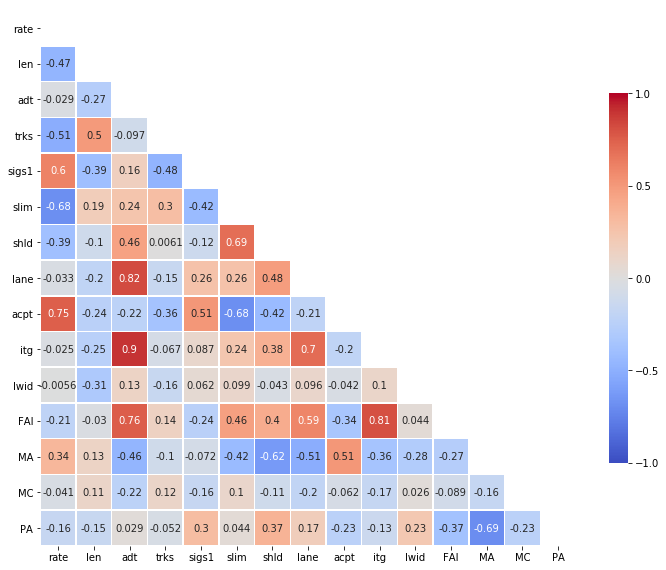

In [22]:
f, ax = plt.subplots(figsize=(12, 17)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap ='coolwarm',
                      cbar_kws={"shrink": .4, 'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 10})
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns) #add the column names as labels
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

heatmap;

# 5) SAVE YOUR HEATMAP

In [ ]:
heatmap.get_figure().savefig('heatmap.png', bbox_inches='tight') #I found that bbox_inches = 'tight' helps your picture not get cut off if it's too big

# BONUS

## Which predictors are most closely correlated with rate?

In [15]:
corr_matrix['rate'].sort_values(ascending = False)

rate     1.000000
acpt     0.752025
sigs1    0.603191
MA       0.337848
lwid    -0.005619
itg     -0.024841
adt     -0.028570
lane    -0.032979
MC      -0.041311
PA      -0.161540
FAI     -0.207610
shld    -0.386907
len     -0.465290
trks    -0.512522
slim    -0.680984
Name: rate, dtype: float64